**Required Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

# **Heart disease**

In [9]:
data = pd.read_csv("/content/drive/MyDrive/datasets/Heart disease/heart_disease.csv")

In [10]:
data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,output
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest                                 270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestoral                     270 non-null    int64  
 5   fasting_blood_sugar                   270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   maximum_heart_rate_achieved           270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope                                 270 non-null    int64  
 11  number_of_major_ves

**data prreprossing**

In [12]:
data.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,output
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


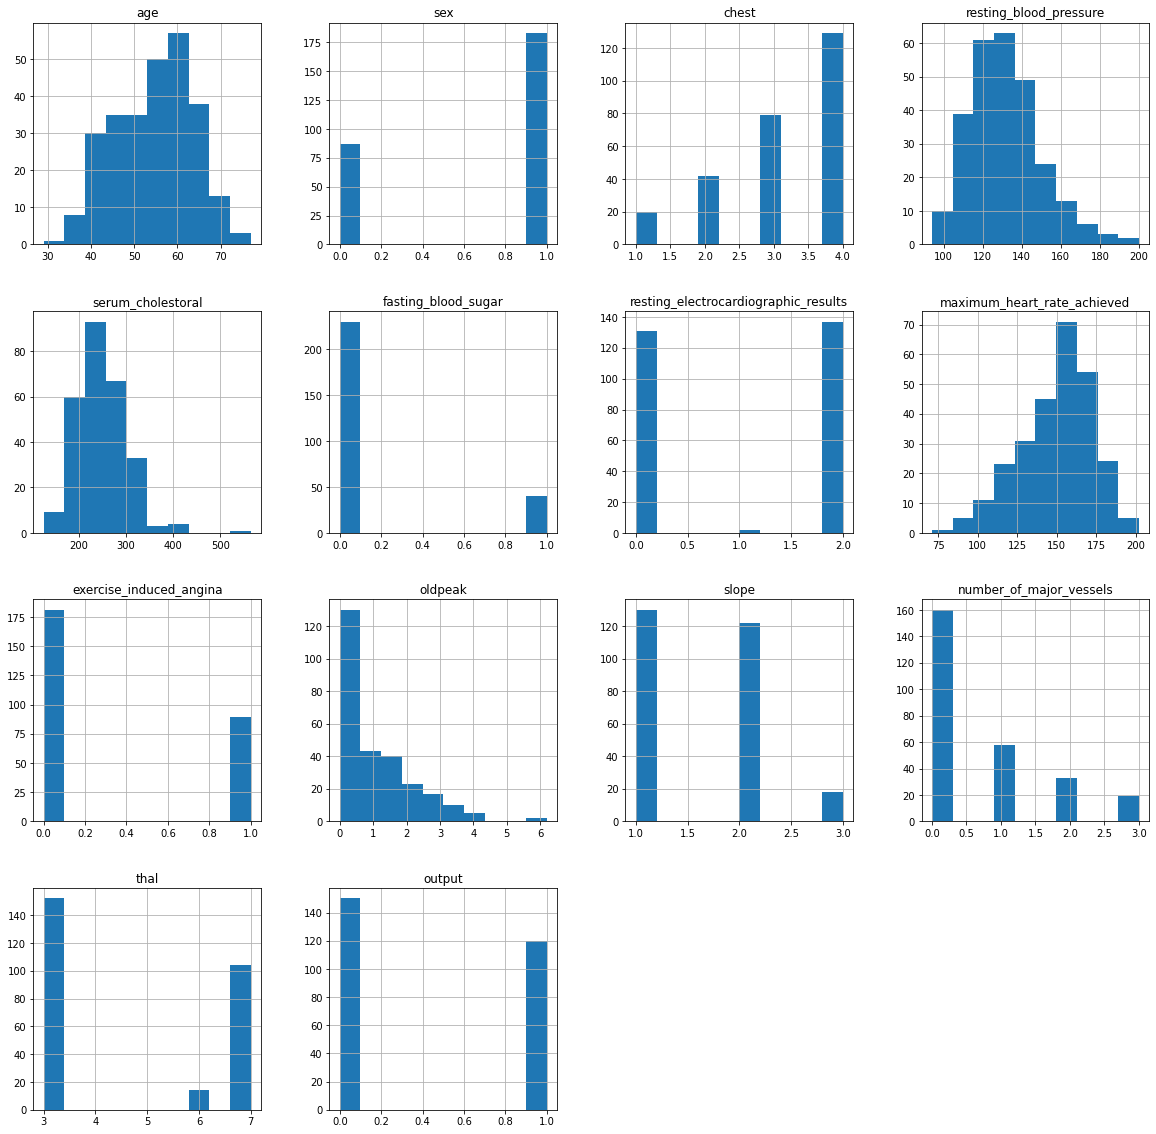

In [13]:
plot = data.hist(figsize = (20,20))

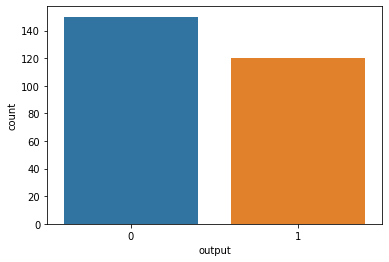

In [14]:
ax = sns.countplot(x="output", data=data)

In [15]:
X = data.drop(['output'],axis=1)
y = data['output']

In [16]:
X.shape


(270, 13)

In [17]:
data.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'output'],
      dtype='object')

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
dataset = pd.DataFrame(scaled, columns=['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal'])

In [19]:
dataset.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


In [20]:
dataset.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
mean,3.667848e-16,9.786410e-17,4.194176e-17,5.723816e-16,-2.343804e-16,8.635068e-18,1.578984e-16,-1.266477e-16,7.154771e-17,4.111937e-17,-1.439178e-16,-7.894919e-17,2.549401e-17
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00
min,-2.797275e+00,-1.450327e+00,-2.292532e+00,-2.094649e+00,-2.396942e+00,-4.170288e-01,-1.026285e+00,-3.402609e+00,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01
25%,-7.075676e-01,-1.450327e+00,-1.835587e-01,-6.363095e-01,-7.105825e-01,-4.170288e-01,-1.026285e+00,-7.212705e-01,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01
50%,6.232461e-02,6.894997e-01,-1.835587e-01,-7.540984e-02,-9.031247e-02,-4.170288e-01,9.816636e-01,1.653012e-01,-7.012223e-01,-2.187060e-01,6.764193e-01,-7.115349e-01,-8.757058e-01
75%,7.222322e-01,6.894997e-01,8.709276e-01,4.854898e-01,5.881079e-01,-4.170288e-01,9.816636e-01,7.058937e-01,1.426081e+00,4.811532e-01,6.764193e-01,3.498708e-01,1.189277e+00
max,2.481986e+00,6.894997e-01,8.709276e-01,3.850888e+00,6.093004e+00,2.397916e+00,9.816636e-01,2.262800e+00,1.426081e+00,4.505343e+00,2.307073e+00,2.472682e+00,1.189277e+00


In [21]:
dataset.shape

(270, 13)

In [22]:
y.shape

(270,)

**Feature Extraction**

In [23]:
correlation = data.corr().T

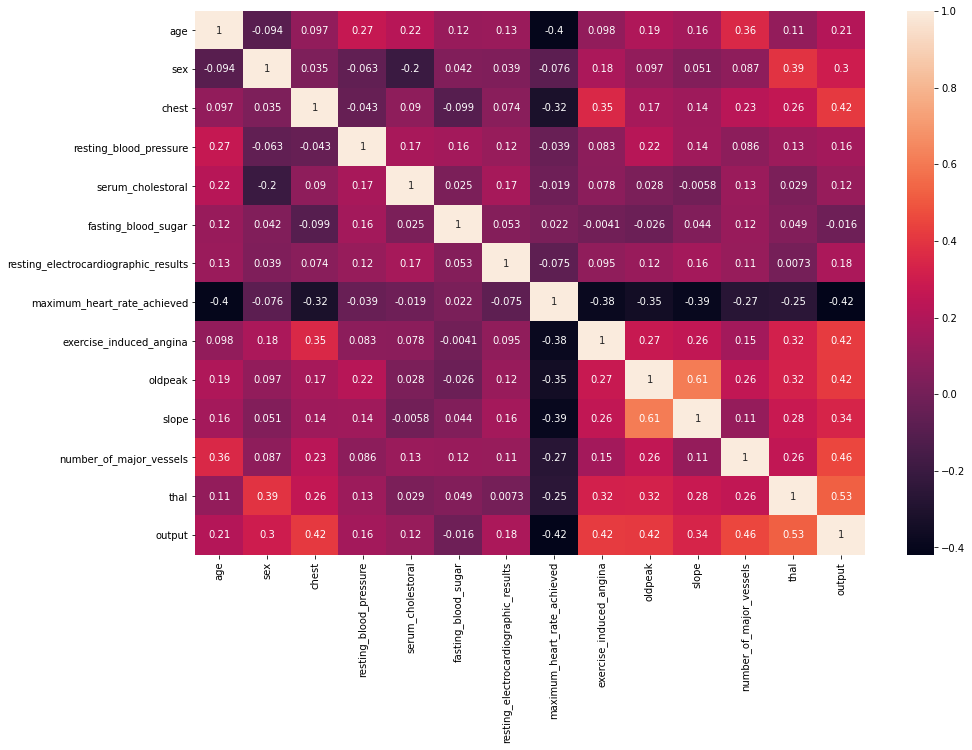

In [24]:
plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation, annot=True)

In [25]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [26]:
print(X.shape,X_train.shape,X_validation.shape)

(270, 13) (216, 13) (54, 13)


In [27]:
print(y.shape,Y_train.shape,Y_validation.shape)

(270,) (216,) (54,)


**model building**

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
#models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('DT', DecisionTreeClassifier(max_leaf_nodes=14, random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators= 10, criterion="entropy")))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
final = []
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.833766 (0.050510)
DT: 0.705411 (0.092576)
NB: 0.833550 (0.065983)
RF: 0.801299 (0.053123)
SVM: 0.555628 (0.018771)


In [29]:
res = {'LogisticRegression':0.8337662337662337,'DecisionTree':0.7054112554112554,"GaussianNB": 0.8335497835497835,"RandomForest": 0.7688311688311689,"SVC":0.5556277056277056 }

**Accuracy Comparision**

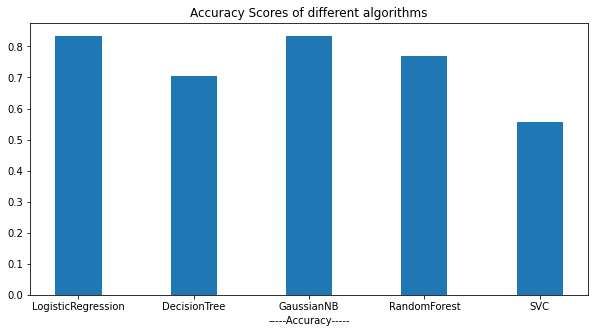

In [31]:
courses = list(res.keys())
values = list(res.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, 
        width = 0.4)
 
plt.xlabel("-----Accuracy-----")

plt.title("Accuracy Scores of different algorithms")
plt.show()

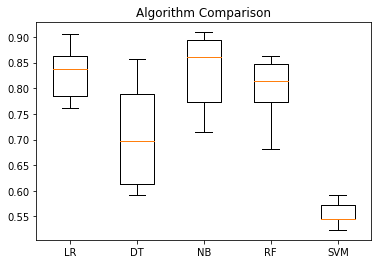

In [32]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

**Cross validation Scores**

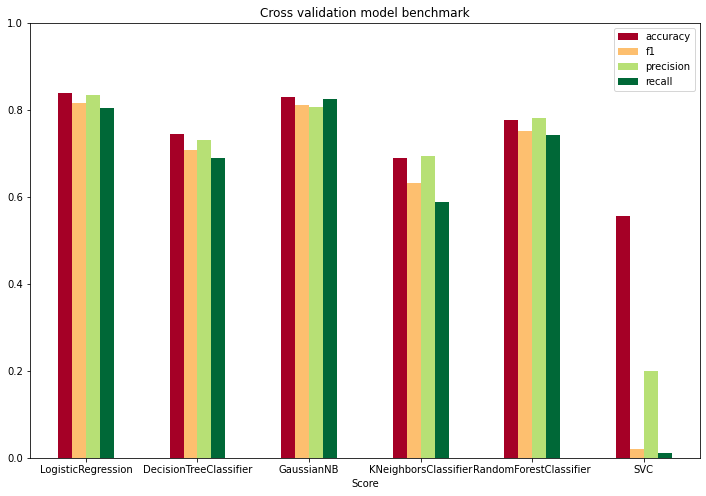

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models_list =[LogisticRegression(solver='lbfgs', max_iter=1000),
              DecisionTreeClassifier(max_leaf_nodes=14, random_state=0),
              GaussianNB(),
              KNeighborsClassifier(n_neighbors=5),
              RandomForestClassifier(n_estimators= 10, criterion="entropy"),
              SVC(gamma='auto')]
score_list = ["accuracy", "f1", "precision", "recall"]

t = plot_cv_score(X = X_train, y = Y_train.values.ravel(), models_list = models_list, cv = 5, scoring_list = score_list, refit = True)

In [34]:
from functools import reduce

def _get_model_name(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name
    
    
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """
    
        
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        if refit:
            model.fit(X, y)
                
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))
    
    
        tmp = pd.DataFrame({name: mean_score}, index = score_list)
        
            
            
        ldf.append(tmp)
        
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
        
    
    
    fig, ax  = plt.subplots(figsize = (12,8))

    frame_scores.plot.bar(ax = ax, cmap="RdYlGn")
    ax.set_ylim([0,1])
    plt.xticks(rotation = 360)
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Cross validation model benchmark")

    if return_scores:    
        return frame_scores

**best model**
Logistic Regression

In [36]:
heart_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [37]:
heart_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = heart_model.predict(X_validation)

In [39]:
accuracy_score(Y_validation,y_pred)

0.8518518518518519

**Confusion Matrix for train data**

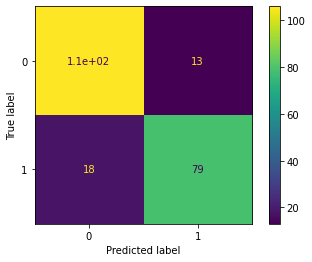

In [43]:
plot_confusion_matrix(heart_model,X_train,Y_train)  
plt.show()

**Confusion matrix for test data**

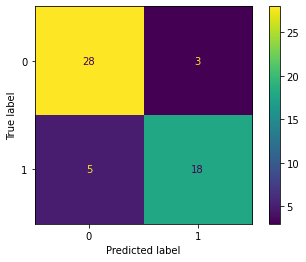

In [42]:
plot_confusion_matrix(heart_model,X_validation,Y_validation)  
plt.show()

In [44]:
print(classification_report(Y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.86      0.78      0.82        23

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.85      0.85      0.85        54

